# FTML Project Exercice 6

### Dataset presentation and problem statement

The Fish Market dataset is a small collection of data points where each row represents an individual fish, described by its species and several physical measurements. These measurements include three types of length (Length1 - 	
vertical length, Length2 - diagonal length, Length3 - cross length), height, and width — all recorded in centimeters — along with the fish's weight in grams. The dataset covers seven distinct species such as Perch, Bream, Pike, Smelt, Roach, Whitefish, and Parkki. It was downloaded from [Kaggle’s Fish Market Dataset](https://www.kaggle.com/datasets/vipullrathod/fish-market).

One interesting feature of this dataset is the inclusion of multiple length measurements, which likely correspond to different fishing industry standards (e.g., standard length, fork length, and total length). This allows for a more detailed description of each fish’s physical form, which is valuable when trying to distinguish between similar-looking species.
Problem Statement

We aim to predict the species of a fish using a set of measured physical features: Weight, Length1, Length2, Length3, Height, and Width.

This classification problem has practical value in industrial fishing environments, especially on large trawler factory ships. In such settings, being able to automatically classify the species of fish that are caught is crucial for real-time sorting, regulatory compliance, and optimizing processing (e.g., filleting, freezing, or discarding protected species).

In [12]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
df = pd.read_csv('data/fish.csv', encoding='ascii', delimiter=',')

display(df.head())
display(df.describe())

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


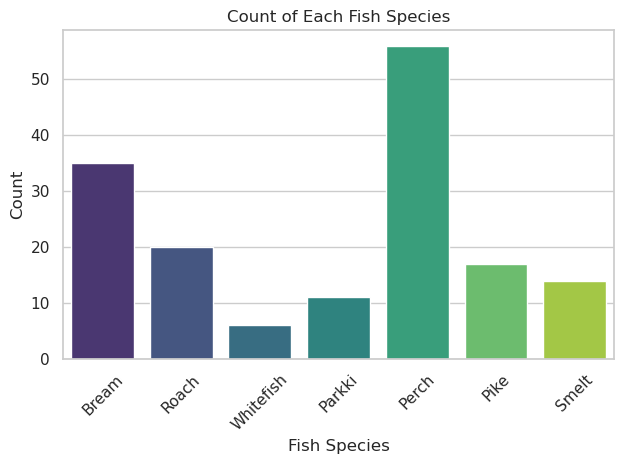

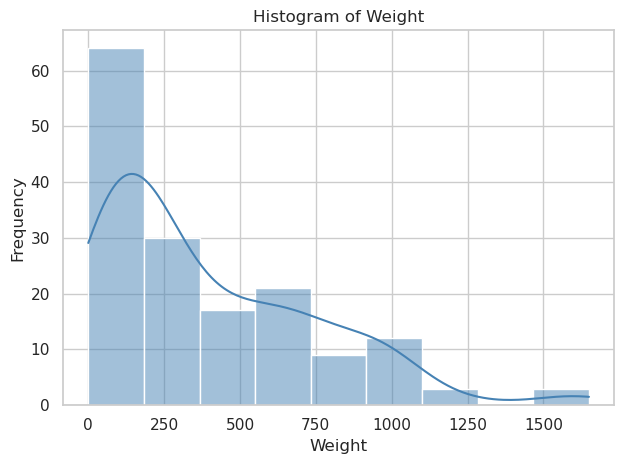

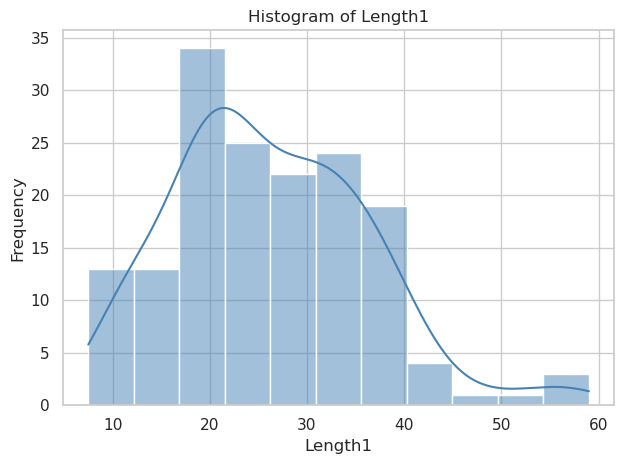

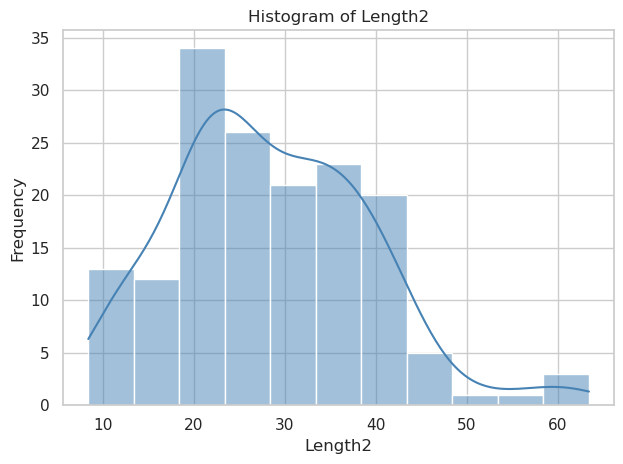

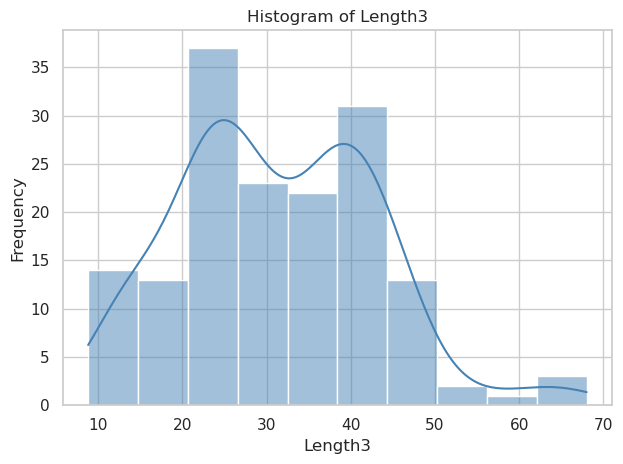

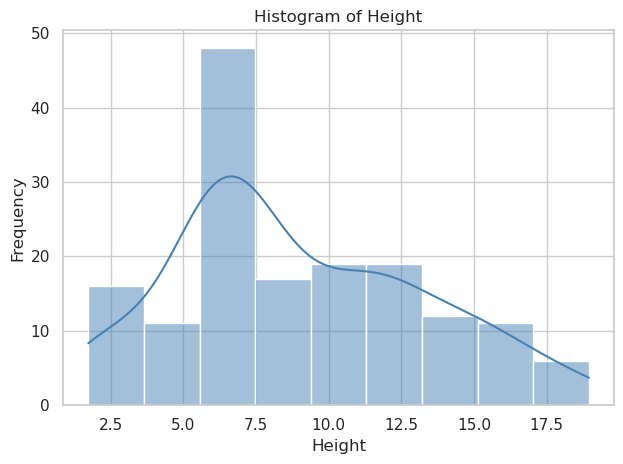

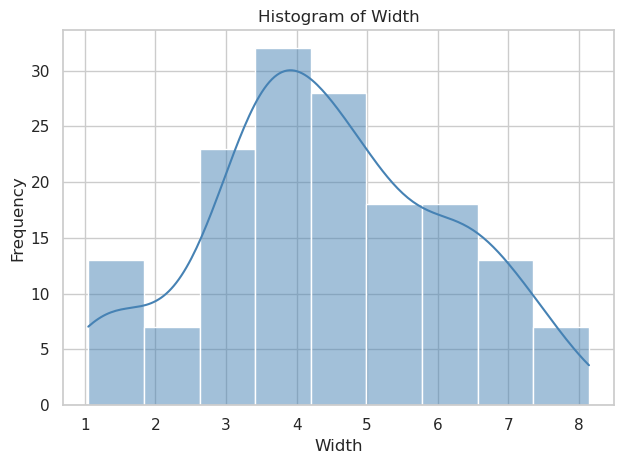

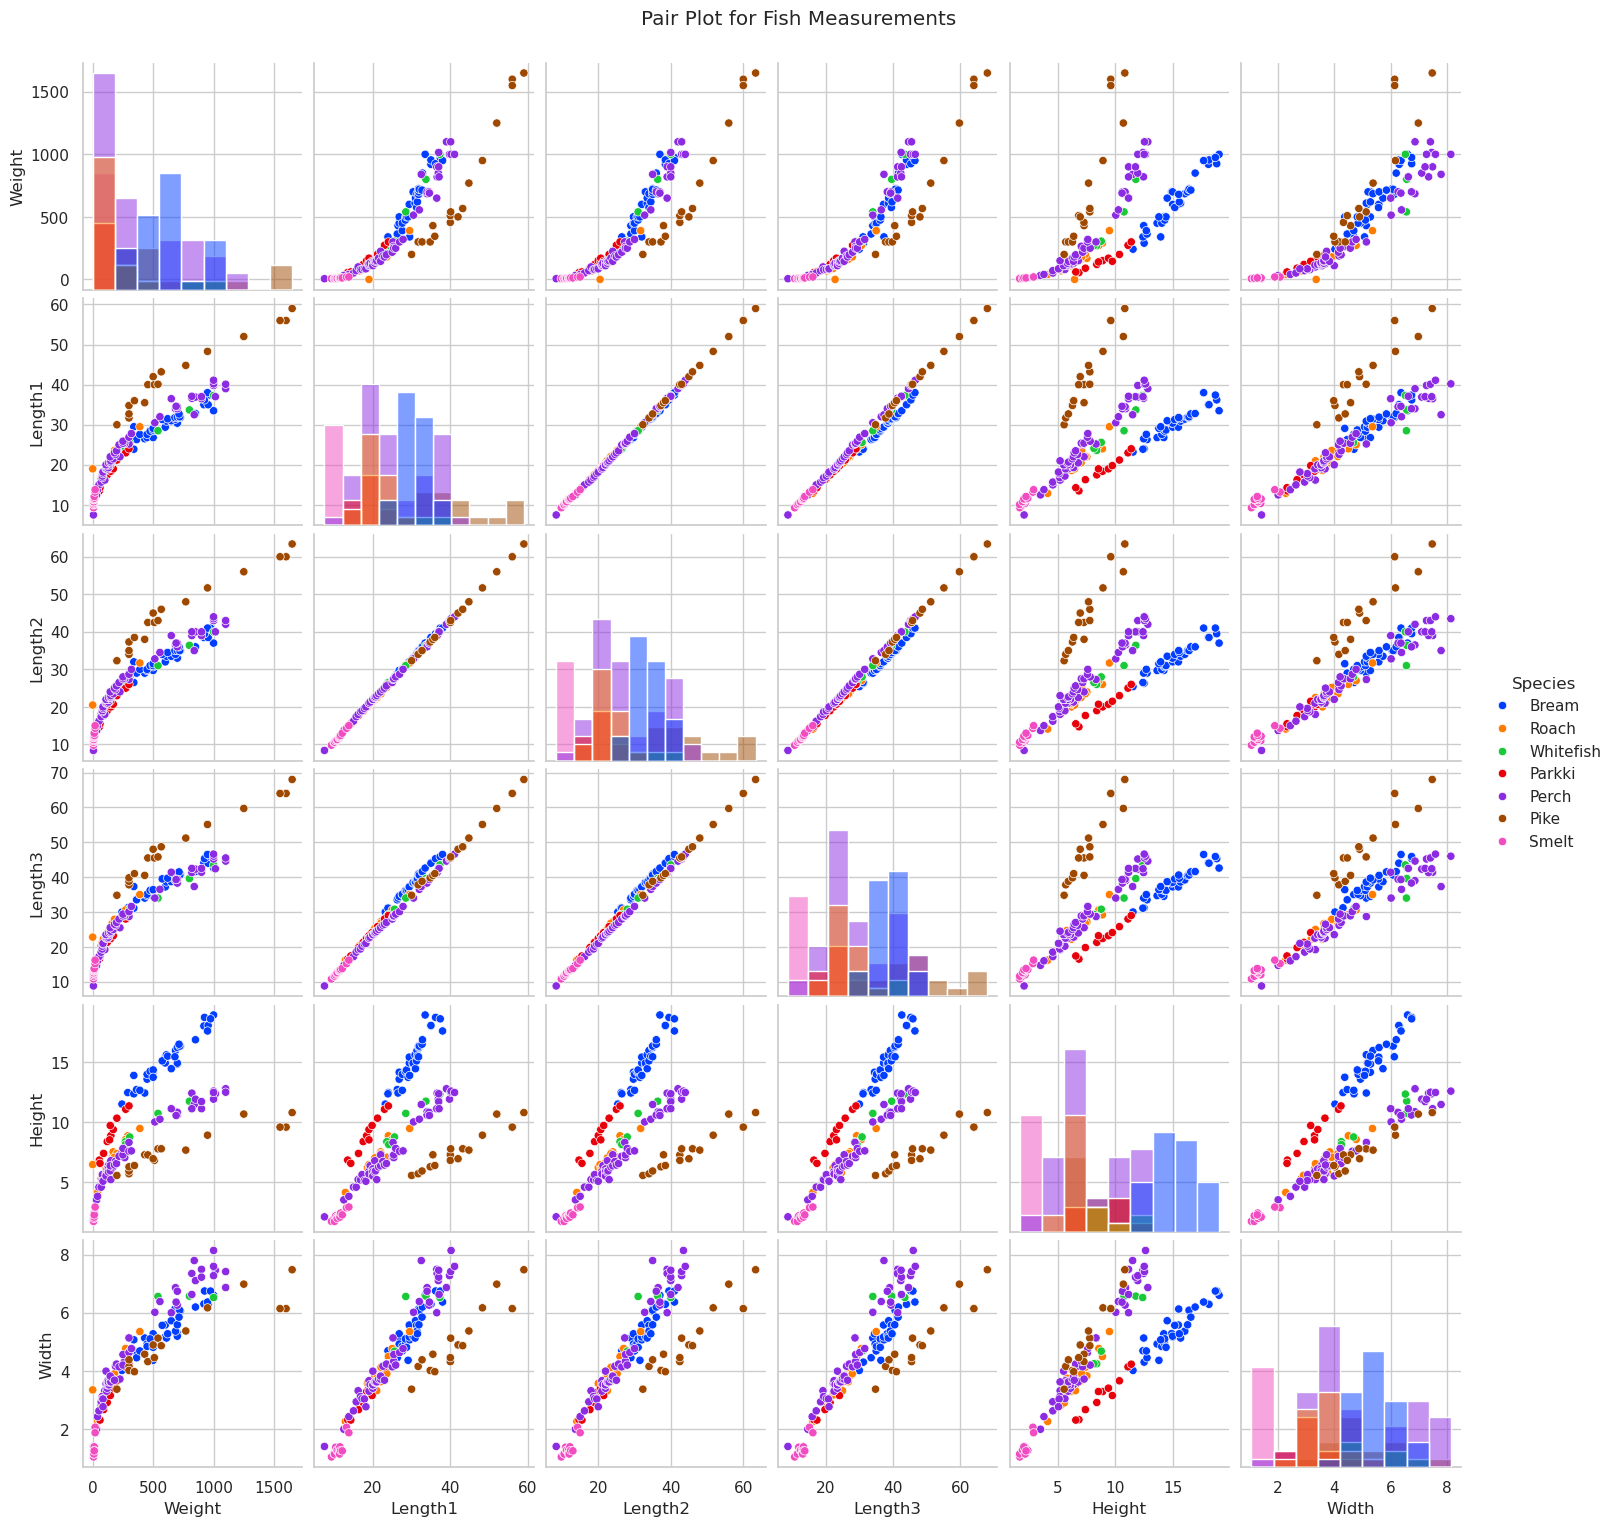

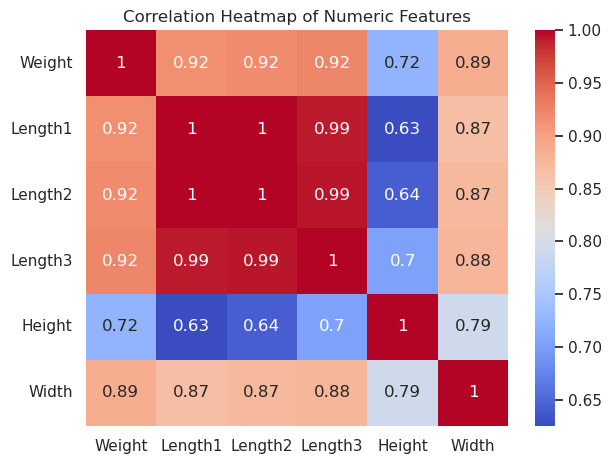

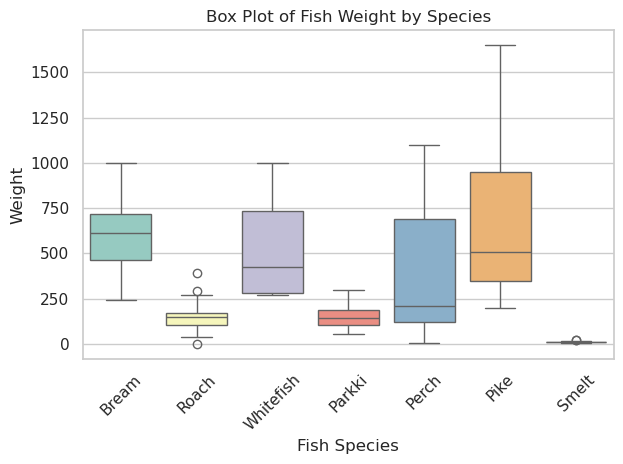

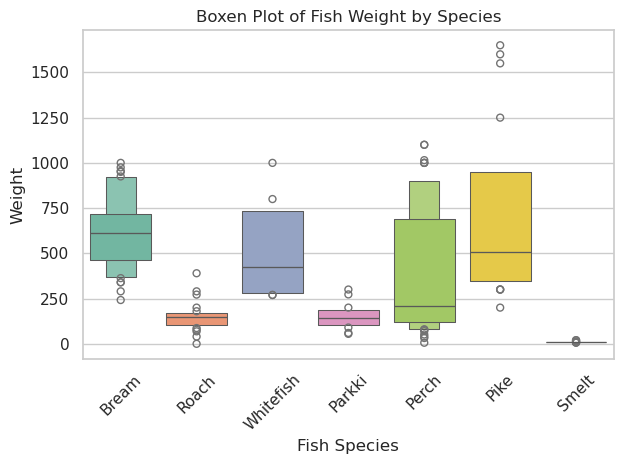

In [10]:
# Distribution of fish species using a count plot (pie chart equivalent in count visualization)
plt.figure()
sns.countplot(x='Species', data=df, hue='Species', palette='viridis', legend=False)
plt.title('Count of Each Fish Species')
plt.xlabel('Fish Species')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histograms for numeric variables
numeric_cols = ['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']
for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, color='steelblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Pair Plot to analyze pairwise relationships, colored by species
sns.pairplot(df, hue='Species', diag_kind='hist', palette='bright')
plt.suptitle('Pair Plot for Fish Measurements', y=1.02)
plt.show()

# Correlation heatmap: reduce dataframe to numeric values
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure()
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()

# Box Plot: visualize the distribution of Weight grouped by Species
plt.figure()
sns.boxplot(x='Species', y='Weight', data=df, hue='Species', palette='Set3')
plt.title('Box Plot of Fish Weight by Species')
plt.xlabel('Fish Species')
plt.ylabel('Weight')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Boxen Plot: an alternative to boxplot for Weight
plt.figure()
sns.boxenplot(x='Species', y='Weight', hue='Species', data=df, palette='Set2')
plt.title('Boxen Plot of Fish Weight by Species')
plt.xlabel('Fish Species')
plt.ylabel('Weight')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# Prepare features (X) and target (y)
feature_cols = ['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']
X = df[feature_cols]
y = df['Species']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Build a RandomForest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Generate predictions
y_pred = rf_model.predict(X_test)

# Calculate prediction accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Prediction Accuracy of the Random Forest model: {accuracy:.4f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Prediction Accuracy of the Random Forest model: 0.8333
Classification Report:
              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        11
      Parkki       1.00      1.00      1.00         3
       Perch       0.76      0.76      0.76        17
        Pike       1.00      1.00      1.00         5
       Roach       0.57      0.67      0.62         6
       Smelt       0.80      1.00      0.89         4
   Whitefish       0.00      0.00      0.00         2

    accuracy                           0.83        48
   macro avg       0.73      0.78      0.75        48
weighted avg       0.80      0.83      0.82        48



/nix/store/67zlahbgknkipcc0n9g6hhyswij3g9wy-python3-3.12.10-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/nix/store/67zlahbgknkipcc0n9g6hhyswij3g9wy-python3-3.12.10-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/nix/store/67zlahbgknkipcc0n9g6hhyswij3g9wy-python3-3.12.10-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division`